In [16]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from astropy.io import fits
import pylab
from scipy import interpolate
from scipy import special
import sys
import time
import os

%matplotlib inline

In [17]:
#for fn in os.listdir('/Users/katelynneese/Desktop/Senior Thesis/images/loopTestQ'):
#     if os.path.isfile(fn):
#        print (fn)

In [18]:
# Open a file
pathQ = "/Users/katelynneese/Desktop/Senior Thesis/images/loopTestQ"
dirs = os.listdir( pathQ )
Qlist = []

# This would print all the files and directories
for file in dirs:
    #print file
    Qlist.append(file)

# Open a file
pathP = "/Users/katelynneese/Desktop/Senior Thesis/images/loopTestPsf"
dirs = os.listdir( pathP )
PSFlist = []

# This would print all the files and directories
for file in dirs[1:]: # first in psf is .DS_STORE, skip it
    #print file
    PSFlist.append(file)
    
    
print Qlist
print PSFlist

QP = zip(Qlist, PSFlist)
print QP

['Q_31.7061017323_-4.24795803233_IBAND.fits', 'Q_32.1693843884_-6.45466948816_IBAND.fits', 'Q_33.4797489178_-5.85588279327_IBAND.fits', 'Q_33.4971225345_-4.66252898058_IBAND.fits', 'Q_34.0253103628_-5.28961637165_IBAND.fits', 'Q_343.71756497_0.775301627033_IBAND.fits', 'Q_36.753194073_-4.33903606255_IBAND.fits', 'Q_37.6661062244_-5.26645712204_IBAND.fits', 'Q_38.2480086808_-5.19600110611_IBAND.fits', 'Q_38.4787682956_-5.52457050417_IBAND.fits']
['psf_31.7061017323_-4.24795803233_IBAND.fits', 'psf_32.1693843884_-6.45466948816_IBAND.fits', 'psf_33.4797489178_-5.85588279327_IBAND.fits', 'psf_33.4971225345_-4.66252898058_IBAND.fits', 'psf_34.0253103628_-5.28961637165_IBAND.fits', 'psf_343.71756497_0.775301627033_IBAND.fits', 'psf_36.753194073_-4.33903606255_IBAND.fits', 'psf_37.6661062244_-5.26645712204_IBAND.fits', 'psf_38.2480086808_-5.19600110611_IBAND.fits', 'psf_38.4787682956_-5.52457050417_IBAND.fits']
[('Q_31.7061017323_-4.24795803233_IBAND.fits', 'psf_31.7061017323_-4.24795803233_I

Filename: images/loopTestQ/Q_31.7061017323_-4.24795803233_IBAND.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    IMAGE       ImageHDU        34   (49, 49)     float32   
2                ImageHDU         5   ()              
3                ImageHDU         5   ()              
Filename: images/loopTestPsf/psf_31.7061017323_-4.24795803233_IBAND.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      16   (43, 43)     float64   


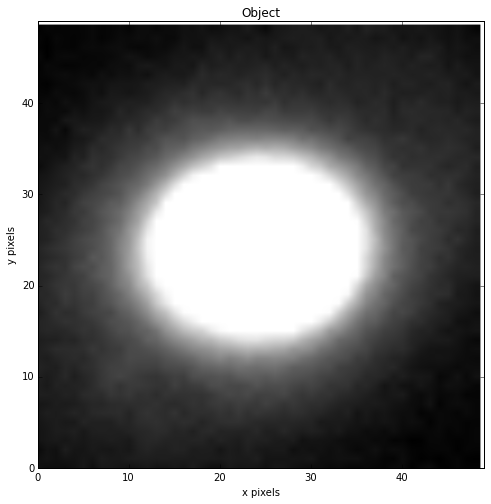

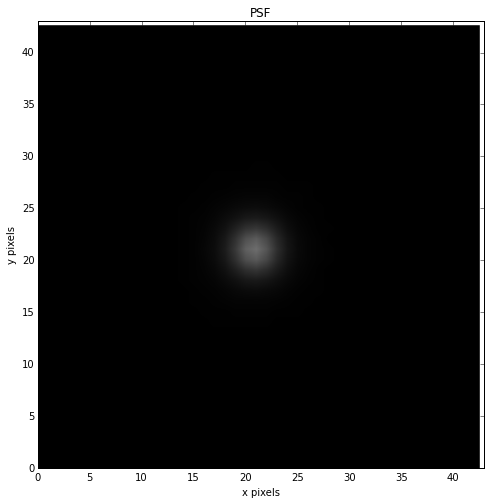

3 46 3 46
(43, 43)


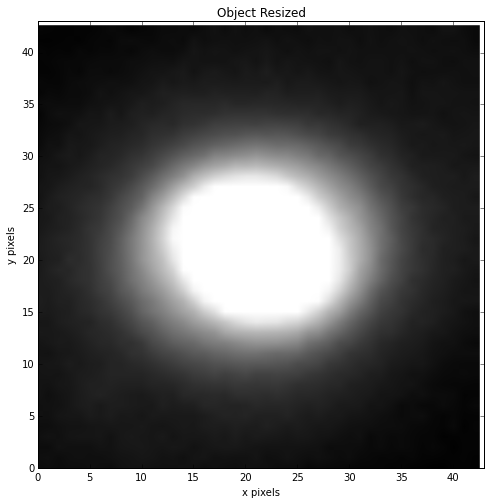

In [28]:
hdulist1 = fits.open('images/loopTestQ/Q_31.7061017323_-4.24795803233_IBAND.fits')  # I band image
hdulist1.info()
hdulistpsf =  fits.open('images/loopTestPsf/psf_31.7061017323_-4.24795803233_IBAND.fits')
Q = hdulist1[1].data
hdulistpsf.info()
size = Q.shape

psf = hdulistpsf[0].data
sizep = psf.shape


pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(Q, vmin = 0, vmax = 5)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Object")
pylab.ylim([0, size[0]])
pylab.xlim([0, size[1]])
plt.show()


pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(psf, vmin = 0, vmax = 0.1)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("PSF")
pylab.ylim([0, sizep[0]])
pylab.xlim([0, sizep[1]])
plt.show()


# remove 343.71756497_0.775301627033_IBAND.fits- poor imaging




im = Q
width, height = im.shape  # Get dimensions
new_width = 43
new_height= 43
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

print left, right, top, bottom

newim = im[left:right, top:bottom]
print newim.shape

pylab.figure(figsize=(8,8))
pylab.gray()
pylab.imshow(newim, vmin = 0, vmax = 10)

pylab.xlabel('x pixels')
pylab.ylabel('y pixels')
pylab.title("Object Resized")
pylab.ylim([0, newim.shape[0]])
pylab.xlim([0, newim.shape[1]])
plt.show()

In [20]:
re_val = np.linspace(0, 20, 40) # In pixels.

n_val = [0.500000, 0.511646, 0.523564, 0.535760, 0.548239, 0.561009, 0.574077, 0.587449, 0.601132, 0.615134, 
        0.629463, 0.644125, 0.659128, 0.674481, 0.690192, 0.706269, 0.722720, 0.739554, 0.756781, 0.774408, 0.792447,
        0.810905, 0.829793, 0.849122, 0.868900, 0.889140, 0.909850, 0.931044, 0.952730, 0.974922, 0.997631, 1.02087, 
        1.04465, 1.06898, 1.09388, 1.11936, 1.14543, 1.17211, 1.19942, 1.22735, 1.25594, 1.28520, 1.31513, 1.34577,
        1.37711, 1.40919, 1.44202, 1.47560, 1.50998, 1.54515, 1.58114, 1.61797, 1.65566, 1.69422, 1.73368, 
        1.77407, 1.81539, 1.85768, 1.90095, 1.94523, 1.99054, 2.03690, 2.08435, 2.13290, 2.18258, 2.23342, 2.28544, 
        2.33868, 2.39315, 2.44889, 2.50594, 2.56431, 2.62404, 2.68516, 2.74770, 2.81171, 2.87720, 2.94422, 3.01280,
        3.08297, 3.15479, 3.22827, 3.30347, 3.38041, 3.45915, 3.53973, 3.62218, 3.70655, 3.79289, 3.88124,
        3.97164, 4.06415]

b_n_val = [0.693147,  0.715714, 0.738844, 0.762549, 0.786841, 0.811733, 0.837242, 0.863377, 0.890152, 0.917581, 
          0.945678, 0.97428497, 1.00414, 1.03425, 1.06512, 1.09675, 1.12917, 1.16237, 1.19659, 1.23123, 1.26689,
          1.3031702, 1.34075, 1.37902, 1.41820, 1.45832, 1.49938, 1.54143, 1.58446, 1.62852, 1.67362, 1.71979, 
          1.76705, 1.81544, 1.86496, 1.91565, 1.96754, 2.02064, 2.07499, 2.1305065, 2.18777, 2.24595, 2.30554, 2.36656, 
          2.4288661, 2.49298, 2.5581791, 2.62540, 2.69396, 2.76411, 2.83590, 2.90938, 2.98457, 3.06153, 3.14028, 
          3.22088, 3.30337, 3.38779, 3.47419, 3.56261, 3.65330, 3.74587, 3.84060, 3.93754, 4.03676, 4.13830, 4.24222, 
          4.34858, 4.45718, 4.5686032, 4.68289, 4.79944, 4.9186685, 5.04102, 5.16591, 5.29381, 5.42469, 5.55860, 5.69563,
          5.83585, 5.97934, 6.1266911, 6.2769893, 6.4308184, 6.58776, 6.74889, 6.91379, 7.08253, 7.25517, 7.4316895, 
          7.61277, 7.79751]




def sersic(n, b_n, re, r): 
    return np.e**(-b_n*((r / re)**(1./n) -1))



In [21]:
# sum (data * psf) = A * sum(psf^2) + B sum(psf * galaxy)
# CHI SQUARED Fitting for galaxy and psf model data

def calcAB(re, data, psf):
    tot = 0
    
    allChi = []
    allA = []
    allB = []
        
    
    for k in range(92):

        sum1 = 0.
        sum1A = 0.
        sum1B = 0.
        dist = 0.
        
        sum2 = 0.
        sum2A = 0.
        sum2B = 0.
        n = n_val[k]
        b_n = b_n_val[k]
        
        #print "For a n, b_n of: ", n, b_n 
        
        # assume resizing before passing
        for i in range(8, 33):
            for j in range(8, 33):
                r = np.sqrt((i - 21)**2 + (j - 21)**2) # -1 not necessary if same size. 21 - center of 43, 43
                d = data[i][j]
                p = psf[i][j]
                s = sersic(n, b_n, re, r)
                sum1 +=  d * p  #data[i-1][j-1] * psf[i][j]
                sum1A += p * p #psf[i][j] * psf[i][j]
                sum1B += p * s  #psf[i][j] * sersic(n, b_n, re, r)
                
                sum2 +=  d * s  #data[i-1][j-1] * sersic(n, b_n, re, r)    
                sum2A += p * s  #sum1B     #psf[i][j] * sersic(n, b_n, re, r)  same as sum1B- don't recalculate
                sum2B += s * s  #(sersic(n, b_n, re, r))**2    
       
        # solve for A and B
        a = ([[sum1A, sum1B],[sum2A, sum2B]])
        b = ([sum1, sum2])
        
        A, B = np.linalg.solve(a, b)
        allA.append(A)
        allB.append(B)
        allChi.append(calcChi2(re, A, B, n, b_n, psf, data))
        
    return chiMin(allChi, allA, allB)

    
    
def calcChi2(re, A, B, n, b_n, psf, data):
    chi2 = 0.  
    for i in range (8, 33):
        for j in range(8, 33):
            r = np.sqrt((i - 21)**2 + (j - 21)**2)
            chi2 += (A * psf[i][j] + B * sersic(n, b_n, re, r) - data[i][j])**2
            
    return chi2

def chiMin(allChi, allA, allB):  # done after calculating A and B values for n and b_n  
    allChi2 = np.asarray(allChi)
    lowIndex = np.where(allChi2 == allChi2.min())[0][0] ## the way np.where works weird
    return allChi[lowIndex], allA[lowIndex], allB[lowIndex], b_n_val[lowIndex], n_val[lowIndex]
    

In [22]:
def reshape(image, w_new, h_new):  # ex. Q, 43, 43 will reshape Q image to (43, 43)
    im = image
    width, height = im.shape  # Get dimensions
    new_width = w_new
    new_height= h_new
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    newim = im[left:right, top:bottom]
    return newim
    

In [146]:
print time.ctime()


for Q, P in QP: # for quasar, psf in QP zipped list
    hdulist1 = fits.open('images/loopTestQ/{0}'.format(Q))  # I band image
    hdulistpsf =  fits.open('images/loopTestPsf/{0}'.format(P))
    
    qdata = hdulist1[1].data
    size = qdata.shape
    
    psf = hdulistpsf[0].data
    sizep = psf.shape

    data = reshape(qdata, 43, 43)
    size = data.shape
    
    # reset variables
    chiMini = sys.maxint
    b_nact= 0
    n_act = 0
    Aact = 0
    Bact = 0
    Re_act = 0
    
    # loop over re
    for i in range(1, 40):
        re = re_val[i]
        chi, A, B, b_n, n = calcAB(re, data, psf)
        
        if chi < chiMini: # if smallest chi so far
            chiMini = chi
            Aact = A
            Bact = B
            b_nact = b_n
            n_act = n
            re_act = re_val[i]
            
    print "For quasar: " + str(Q) + " chi, A, B, b_n, n, re: " + str(chiMini), str(Aact), str(Bact), str(b_nact), str(n_act), str(re_act)
    print 
    print # later instead of printing, write to fits file
print time.ctime()

        
            

Sat Apr 29 19:30:19 2017
For quasar: Q_31.7061017323_-4.24795803233_IBAND.fits chi, A, B, b_n, n, re: 489.871792644 1776.59592039 8.37052336999 1.34075 0.829793 7.69230769231


For quasar: Q_32.1693843884_-6.45466948816_IBAND.fits chi, A, B, b_n, n, re: 2147.30841431 2956.01117585 15.3904003618 1.3031702 0.810905 9.23076923077


For quasar: Q_33.4797489178_-5.85588279327_IBAND.fits chi, A, B, b_n, n, re: 26987.1060002 -501.171765792 58.7956905723 1.58446 0.95273 4.10256410256


For quasar: Q_33.4971225345_-4.66252898058_IBAND.fits chi, A, B, b_n, n, re: 1680.88121325 800.929242263 6.65838014441 1.34075 0.829793 7.69230769231


For quasar: Q_34.0253103628_-5.28961637165_IBAND.fits chi, A, B, b_n, n, re: 3327.25700226 3428.28118151 6.04778190921 1.71979 1.02087 9.74358974359


For quasar: Q_343.71756497_0.775301627033_IBAND.fits chi, A, B, b_n, n, re: 17779.9756129 409.40550799 6.17657290597 0.693147 0.5 9.74358974359


For quasar: Q_36.753194073_-4.33903606255_IBAND.fits chi, A, B, b_n,

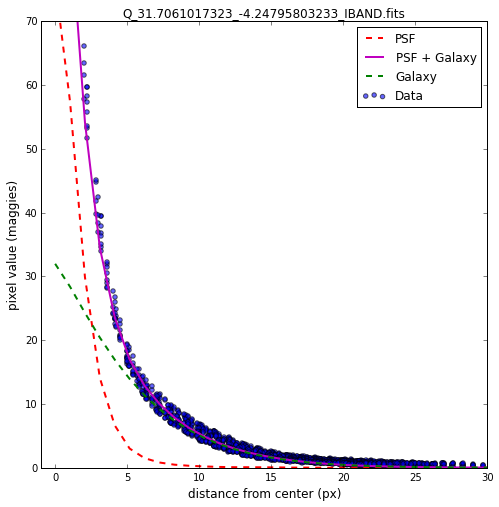

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:89: RuntimeWarning: invalid value encountered in log10


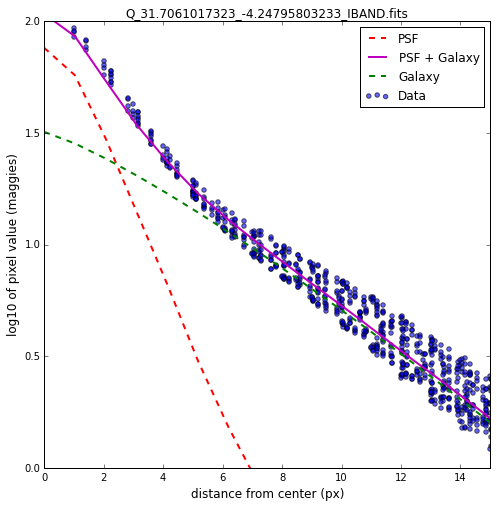

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in log10


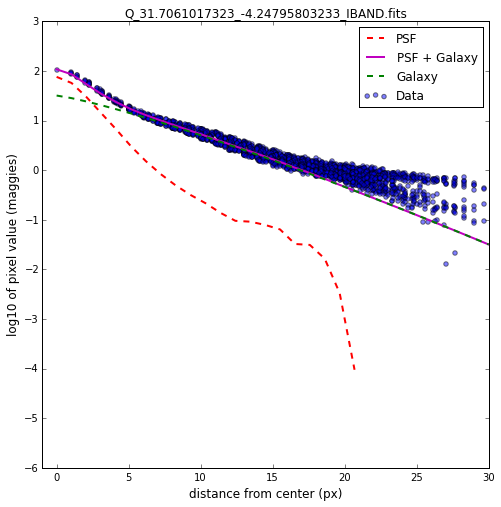

In [23]:
#Great fits: QP index 0, 7 - both (49, 49) shape
#terrible fits:  5,    
# 2, 9, 8- too large image, not contained; 6- Q(49, 48), 8- Q(48, 49) P(43, 41)
# meh fits: Q(48, 49), Q(49, 48)
# 4, 5 - bad image


# hey, even 6 doesn't look *that* bad in graph form.


Q, P = QP[0]

#  A, B, b_n, n, re: 489.871792644 1776.59592039 8.37052336999 1.34075 0.829793 7.69230769231

A = 1776.59592039
B = 8.37052336999 
b_n = 1.34075
n = 0.829793
re =7.69230769231

hdulist1 = fits.open('images/loopTestQ/{0}'.format(Q))  # I band image
hdulistpsf =  fits.open('images/loopTestPsf/{0}'.format(P))
    
qdata = hdulist1[1].data
size = qdata.shape
    
psf = hdulistpsf[0].data
sizep = psf.shape

data = reshape(qdata, 43, 43)
size = data.shape


nx, ny = data.shape
x = np.arange(nx) - (nx-1)/2. 
y = np.arange(ny) - (ny-1)/2.
X, Y = np.meshgrid(x, y)
d = np.sqrt(X**2 + Y**2)


nxp, nyp = psf.shape
xp = np.arange(nxp) - (nxp-1)/2. 
yp = np.arange(nyp) - (nyp-1)/2.
Xp, Yp = np.meshgrid(xp, yp)
d_psf = np.sqrt(Xp**2 + Yp**2)


r = np.linspace(0, 30, 30)
galaxy = B * sersic(n, b_n, re, r)
galaxy = np.asarray(galaxy)






def psf_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int) # rounds distances to integers
    
    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    psfprofile = tbin / nr
    return psfprofile 




center = (21, 21)
psfplot = A * psf_profile(psf, center)

#print psfplot
pylab.figure(figsize=(8,8))
plt.plot(r, psfplot, 'r--', linewidth=2.0, label="PSF")
plt.plot(r, psfplot + galaxy, 'm-', linewidth=2.0, label="PSF + Galaxy")
plt.plot(r, galaxy, 'g--', linewidth=2.0, label="Galaxy")
plt.scatter(d, data, alpha=0.6, label="Data")
pylab.title("{0}".format(Q))
pylab.xlabel('distance from center (px)', size = 12)
pylab.ylabel('pixel value (maggies)', size = 12)
pylab.ylim([0, 70])
pylab.xlim([-1, 30]) 
plt.legend()
plt.show()


pylab.figure(figsize=(8,8))
plt.plot(r, np.log10(psfplot), 'r--', linewidth=2.0, label="PSF")
plt.plot(r, np.log10(psfplot + galaxy), 'm-', linewidth=2.0, label="PSF + Galaxy")
plt.plot(r, np.log10(galaxy), 'g--', linewidth=2.0, label="Galaxy")
plt.scatter(d, np.log10(data), alpha=0.6, label="Data")
pylab.ylim([0, 2])
pylab.xlim([-.01, 15]) 
pylab.title("{0}".format(Q))
pylab.xlabel('distance from center (px)', size= 12)
pylab.ylabel('log10 of pixel value (maggies)', size = 12)
plt.legend()
plt.show()

pylab.figure(figsize=(8,8))
plt.plot(r, np.log10(psfplot), 'r--', linewidth=2.0, label="PSF")
plt.plot(r, np.log10(psfplot + galaxy), 'm-', linewidth=2.0, label="PSF + Galaxy")
plt.scatter(d, np.log10(data), alpha=0.5, label="Data")
plt.plot(r, np.log10(galaxy), 'g--', linewidth=2.0, label="Galaxy")
pylab.title("{0}".format(Q))
pylab.ylim([-6,3])
pylab.xlim([-1, 30]) 
pylab.xlabel('distance from center (px)', size= 12)
pylab.ylabel('log10 of pixel value (maggies)', size = 12)
plt.legend()

plt.show()


# GRAPH chi^2 (y) vs R_e (x) for contrains and vs n (x) -- above
# go to chi^2 + 1 - the width gives the error -- above
# integrate the flux
# do same graph for other bands, but re and b_n and n are already picked






In [24]:
def calcFlux(B, re, b_n, n):
    solu1 = 2 * np.pi * B * re**2 * n * np.e**b_n * b_n**(-2*n) 
    solu2 = special.gamma(2*n)
    return solu1*solu2

In [30]:
# for a good fit:
# Q_31.7061017323_-4.24795803233_IBAND.fits 
# chi, A, B, b_n, n, re: 489.871792644 1776.59592039 8.37052336999 1.34075 0.829793 7.69230769231

zero_point = 27.0

maggiesI = calcFlux(8.37052336999,7.69230769231, 1.34075, 0.829793)
magnitudesI = zero_point - 2.5*np.log10(maggiesI)

# galaxy magnitudes in I band
print magnitudesI 

17.6550840042


In [1]:

"""For quasar: Q_31.7061017323_-4.24795803233_IBAND.fits chi, A, B, b_n, n, re: 489.871792644 1776.59592039 8.37052336999 1.34075 0.829793 7.69230769231


For quasar: Q_32.1693843884_-6.45466948816_IBAND.fits chi, A, B, b_n, n, re: 2147.30841431 2956.01117585 15.3904003618 1.3031702 0.810905 9.23076923077


For quasar: Q_33.4797489178_-5.85588279327_IBAND.fits chi, A, B, b_n, n, re: 26987.1060002 -501.171765792 58.7956905723 1.58446 0.95273 4.10256410256


For quasar: Q_33.4971225345_-4.66252898058_IBAND.fits chi, A, B, b_n, n, re: 1680.88121325 800.929242263 6.65838014441 1.34075 0.829793 7.69230769231


For quasar: Q_34.0253103628_-5.28961637165_IBAND.fits chi, A, B, b_n, n, re: 3327.25700226 3428.28118151 6.04778190921 1.71979 1.02087 9.74358974359


For quasar: Q_343.71756497_0.775301627033_IBAND.fits chi, A, B, b_n, n, re: 17779.9756129 409.40550799 6.17657290597 0.693147 0.5 9.74358974359


For quasar: Q_36.753194073_-4.33903606255_IBAND.fits chi, A, B, b_n, n, re: 9520.27088981 2998.5603184 16.7316493712 1.54143 0.931044 8.20512820513


For quasar: Q_37.6661062244_-5.26645712204_IBAND.fits chi, A, B, b_n, n, re: 390.989995714 741.90111049 6.62582271606 1.34075 0.829793 7.69230769231


For quasar: Q_38.2480086808_-5.19600110611_IBAND.fits chi, A, B, b_n, n, re: 11628.9906286 -229.848587518 22.3024269001 1.71979 1.02087 4.10256410256


For quasar: Q_38.4787682956_-5.52457050417_IBAND.fits chi, A, B, b_n, n, re: 3473.49929526 924.006794473 17.8297047965 1.34075 0.829793 5.12820512821"""

'For quasar: Q_31.7061017323_-4.24795803233_IBAND.fits chi, A, B, b_n, n, re: 489.871792644 1776.59592039 8.37052336999 1.34075 0.829793 7.69230769231\n\n\nFor quasar: Q_32.1693843884_-6.45466948816_IBAND.fits chi, A, B, b_n, n, re: 2147.30841431 2956.01117585 15.3904003618 1.3031702 0.810905 9.23076923077\n\n\nFor quasar: Q_33.4797489178_-5.85588279327_IBAND.fits chi, A, B, b_n, n, re: 26987.1060002 -501.171765792 58.7956905723 1.58446 0.95273 4.10256410256\n\n\nFor quasar: Q_33.4971225345_-4.66252898058_IBAND.fits chi, A, B, b_n, n, re: 1680.88121325 800.929242263 6.65838014441 1.34075 0.829793 7.69230769231\n\n\nFor quasar: Q_34.0253103628_-5.28961637165_IBAND.fits chi, A, B, b_n, n, re: 3327.25700226 3428.28118151 6.04778190921 1.71979 1.02087 9.74358974359\n\n\nFor quasar: Q_343.71756497_0.775301627033_IBAND.fits chi, A, B, b_n, n, re: 17779.9756129 409.40550799 6.17657290597 0.693147 0.5 9.74358974359\n\n\nFor quasar: Q_36.753194073_-4.33903606255_IBAND.fits chi, A, B, b_n, n, re